In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils.np_utils import to_categorical
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Lambda, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

<h2>Opis problema</h2>

Podano imamo črno belo sliko velikosti 28x28 zapisano v csv zapisu oziroma imamo podanih 784 pixlov iz katerih moramo ugotoviti narisano številko. Podano imamo train.csv, ki vsebuje slike številk, ter rešitev. To uporabimo za učenje modelov. Podano imamo tudi test.csv, ki ne vsebuje rešitev, s tem testiramo natančnost modela (našo rešitev nato oddamo na https://www.kaggle.com/c/digit-recognizer/overview)

<h2>Vizualizacija</h2>

Prvo naložimo podatke v numpy array-je

In [2]:
print("Getting data")
train_raw = np.genfromtxt('./podatki/train.csv', delimiter=',', skip_header=1, dtype=np.int16)
test_raw = np.genfromtxt('./podatki/test.csv', delimiter=',', skip_header=1, dtype=np.int16)
print("Got data")

train_data = []
test_data = []
rezultati = []

#razdelitev podatkov v terke z dejanskim rezultatom in matriko (tabelo tabel) velikosti 28x28
for line in train_raw:
    rezultati.append(line[0])
    train_data.append(line[1:].reshape(28, 28))
for line in test_raw:
    test_data.append(line.reshape(28, 28))

train_data = np.array(train_data)
test_data = np.array(test_data)
rezultati = np.array(rezultati) 

Getting data
Got data


Izpišemo histogram številk v train.csv
Definiramo funkcijo, ki izpise prvih 8 podane številke iz train.csv. V našem primeru 1,2 in 3.

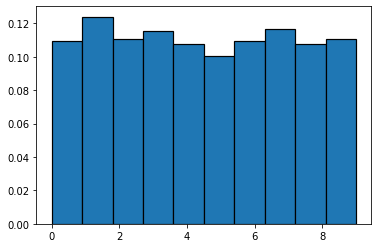

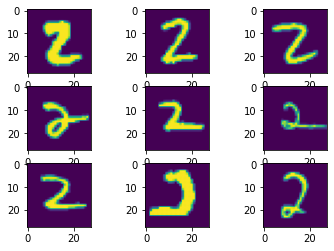

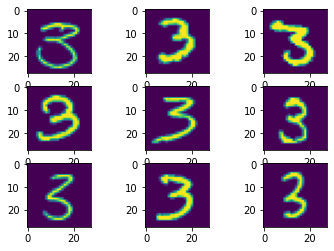

In [6]:

plt.hist(rezultati, density=True, bins=10, edgecolor='black', linewidth=1.2)

def vizualizacija(rez,data,stevilka):
    fig, axs = plt.subplots(3, 3)
    selection = rez == stevilka
    selected_data = data[selection]
    axs[0,0].imshow(selected_data[0])
    axs[0,1].imshow(selected_data[1])
    axs[0,2].imshow(selected_data[2])
    axs[1,0].imshow(selected_data[3])
    axs[1,1].imshow(selected_data[4])
    axs[1,2].imshow(selected_data[5])
    axs[2,0].imshow(selected_data[6])
    axs[2,1].imshow(selected_data[7])
    axs[2,2].imshow(selected_data[8])

    plt.show()


#   Vpiši vizualizacija katere številke te zanima, dobis prvih 8
vizualizacija(rezultati,train_data,2)
vizualizacija(rezultati,train_data,3)

## Učenje modela z CNN Model ###

#### Najprej naložimo podatke in jih razdelimo na testno in učno množico ter spremenimo format podatkov.


In [ ]:
train = pd.read_csv('podatki/train.csv')
test = pd.read_csv('podatki/test.csv')
X_train = (train.iloc[:, 1:].values).astype('float32')  #vsi pixli
Y_train = train.iloc[:, 0].values.astype('int32') #target stevilke
X_test = test.values.astype('float32')


                        #(slika, #st vrstic, #st stolpcev, #barva)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


#### Podatke standardiziramo, tako podatke centriramo okoli varijance in povprečja, z funkcijo "stand"

In [ ]:
mean_pixl = X_train.mean().astype(np.float32)
std_pikl = X_train.std().astype(np.float32)
def stand(x):
    return (x-mean_pixl)/std_pikl


#### Uporabimo "One-Hot encoding" da določimo števila od 0 do 9. Primer: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]  predstavlja številko 5. Torej tam kjer je bit 1 vzamemo indeks in dobimo številko. 

In [ ]:
import tensorflow as tf
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train)
num_of_classes = Y_train.shape[1]
num_of_classes

#### CNN - Convolution Neural Network, so najbolj uporabne pri procesiranju slik, zato smo jih tudi uporabli za naš model.


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

def cnn_model():
    model = Sequential([
        Lambda(stand, input_shape=(28, 28, 1)),
        Convolution2D(32, (3, 3), activation='relu'),
        Convolution2D(32, (3, 3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64, (3, 3), activation='relu'),
        Convolution2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = cnn_model()

